In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data=pd.read_csv("Downloads/Mall_Customers.csv")
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
from sklearn.cluster import KMeans

In [20]:
x=data.iloc[:,[3,4]].values

In [21]:
k_range=range(1,11)
sse=[]

In [22]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_) 

In [23]:
sse

[269981.28,
 183653.32894736843,
 106348.37306211122,
 73880.64496247195,
 44454.476479679724,
 38814.850052563714,
 32227.558007109168,
 25061.304119069326,
 22289.580190554123,
 21281.615051615052]

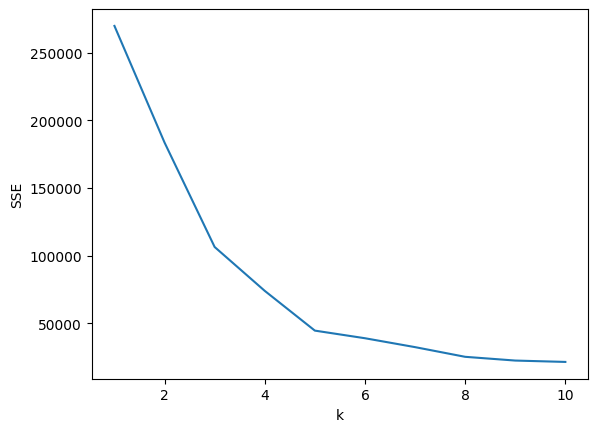

In [24]:
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(k_range,sse)

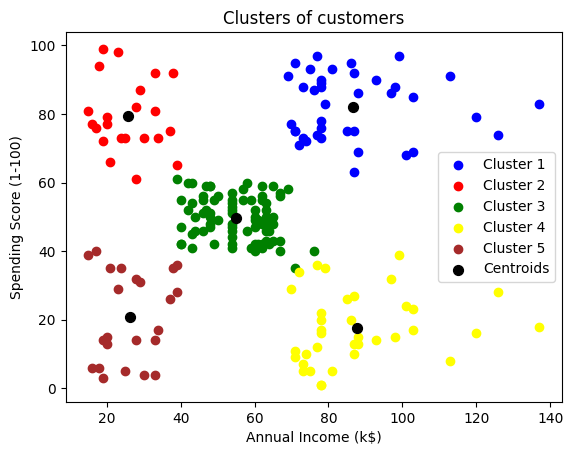

In [41]:
kmeans = KMeans(n_clusters=5)
y_means = kmeans.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], color='blue', label='Cluster 1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], color='red', label='Cluster 2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], color='green', label='Cluster 3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], color='yellow', label='Cluster 4')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], color='brown', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, color='black', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [43]:
data['Target']=y_means

In [44]:
df=data
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


In [47]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])

In [54]:
X=df.drop(['CustomerID','Target'],axis=1)
y=df.Target

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_train,y_train)
y_pred_log=reg.predict(x_test)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
from sklearn.metrics import accuracy_score
score_reg=accuracy_score(y_test,y_pred_log)
score_reg

0.85

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred_gb=gb.predict(x_test)

In [66]:
score_gb=accuracy_score(y_test,y_pred_gb)
score_gb

0.95

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

In [71]:
score_rf=accuracy_score(y_test,y_pred_rf)
score_rf

0.975

In [73]:
prediction_vs_actual=pd.DataFrame({'Actual':y_test,'Prediction':y_pred_rf})
prediction_vs_actual

,Actual,Prediction
95,2,2
15,1,1
30,4,4
158,3,3
128,3,3
115,2,2
69,2,2
170,3,3
174,3,3
45,1,1
